In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
learning_rate = 0.001
training_epochs = 1000
display_step = 50

In [3]:
array_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
array_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n = array_X.shape[0]

In [14]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

rng = np.random

W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [15]:
pred = tf.add(tf.multiply(X, W), b)
cost1 = tf.reduce_sum(tf.sqrt(tf.pow(pred-Y, 2)/(2*n)))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost1)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 1.406955361 W= 0.41112 b= -0.391898
Epoch: 0100 cost= 1.381381512 W= 0.406913 b= -0.356566
Epoch: 0150 cost= 1.355807543 W= 0.402707 b= -0.321235
Epoch: 0200 cost= 1.330233812 W= 0.398501 b= -0.285903
Epoch: 0250 cost= 1.304660082 W= 0.394295 b= -0.250571
Epoch: 0300 cost= 1.279190302 W= 0.390089 b= -0.215243
Epoch: 0350 cost= 1.254199266 W= 0.385882 b= -0.179914
Epoch: 0400 cost= 1.229208231 W= 0.381676 b= -0.144586
Epoch: 0450 cost= 1.204217315 W= 0.37747 b= -0.109258
Epoch: 0500 cost= 1.179226279 W= 0.373264 b= -0.0739291
Epoch: 0550 cost= 1.154235363 W= 0.369058 b= -0.0386006
Epoch: 0600 cost= 1.129244089 W= 0.364852 b= -0.00327186
Epoch: 0650 cost= 1.103463650 W= 0.357902 b= 0.0317139
Epoch: 0700 cost= 1.077892423 W= 0.353696 b= 0.0670424
Epoch: 0750 cost= 1.052107334 W= 0.350571 b= 0.101685
Epoch: 0800 cost= 1.035043120 W= 0.343923 b= 0.12981
Epoch: 0850 cost= 1.018815041 W= 0.337158 b= 0.157593
Epoch: 0900 cost= 1.002586842 W= 0.330393 b= 0.185376
Epoch: 0950 c

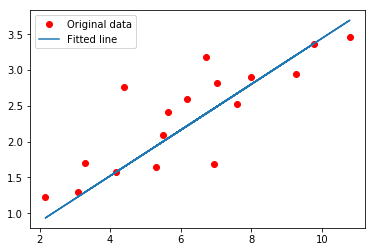

In [16]:
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(array_X,array_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost1, feed_dict={X: array_X, Y:array_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost1, feed_dict={X: array_X, Y: array_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(array_X, array_Y, 'ro', label='Original data')
    plt.plot(array_X, sess.run(W) * array_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()